# Car Price Prediciton

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

- name
- year
- selling_price
- km_driven
- fuel
- seller_type
- transmission
- Owner

**Objective:** Predict the selling price of the car

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car data.csv')
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
# checking for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [12]:
# checking for unique values of categorical features

for column in df.columns:
    #print(column)
    
    if df[column].dtypes == 'object':
        
        print(df[column].unique())
        print('-'*70)

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [13]:
# creating a new feature i.e age of the car

df['Year old'] = df['Year'].apply(lambda x: 2021-x)

In [14]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
# Year is not usefull now
# Also car_name is not useful in determining the selling price of the car

df = df.drop(['Car_Name','Year'] , axis=1)

In [16]:
# converting categorical features into one-hot encoded features

df = pd.get_dummies(df , drop_first=True)

df.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,Year old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
5,9.25,9.83,2071,0,3,1,0,0,1
6,6.75,8.12,18796,0,6,0,1,0,1
7,6.50,8.61,33429,0,6,1,0,0,1
8,8.75,8.89,20273,0,5,1,0,0,1
9,7.45,8.92,42367,0,6,1,0,0,1


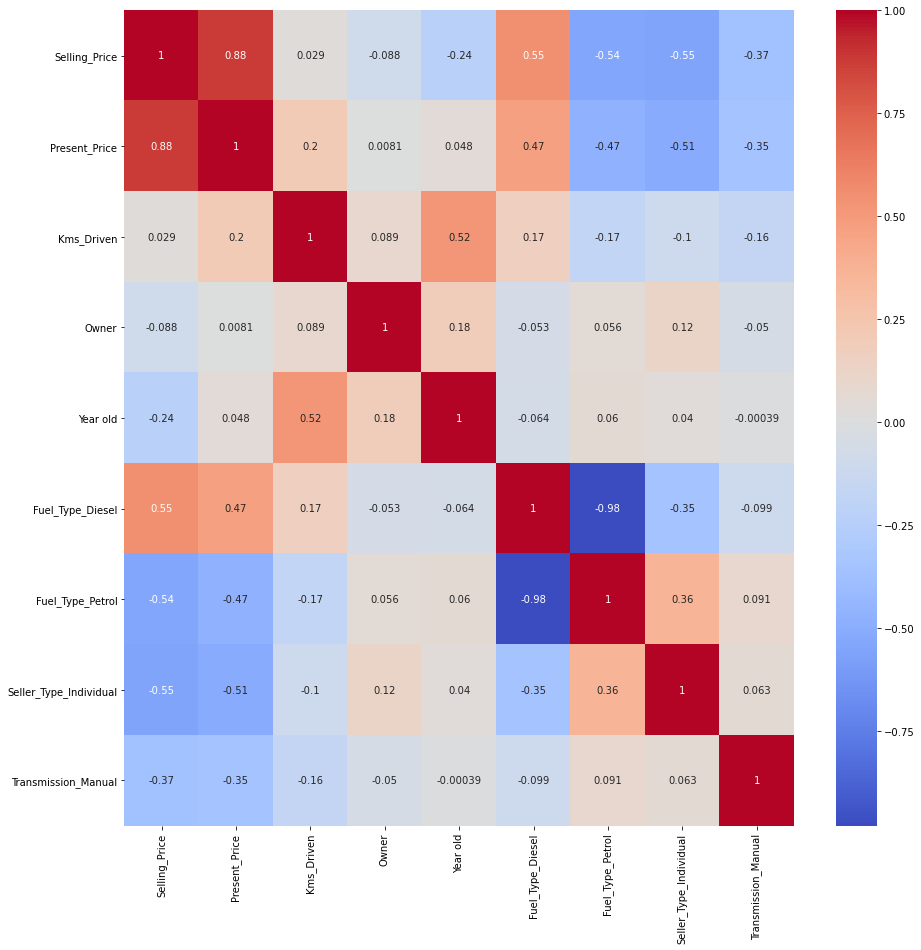

In [17]:
# Analyzing the corellation between various features

corr = df.corr()
plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True , cmap='coolwarm')

- Selling price is positively correlated with Present price.
- Selling price is also getting impacted by the diesel fuel type of vehicles.
- Kms driven will be more if the car is more and more old

In [18]:
x = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

In [19]:
# Feature importance

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

model.fit(x,y)

ExtraTreesRegressor()

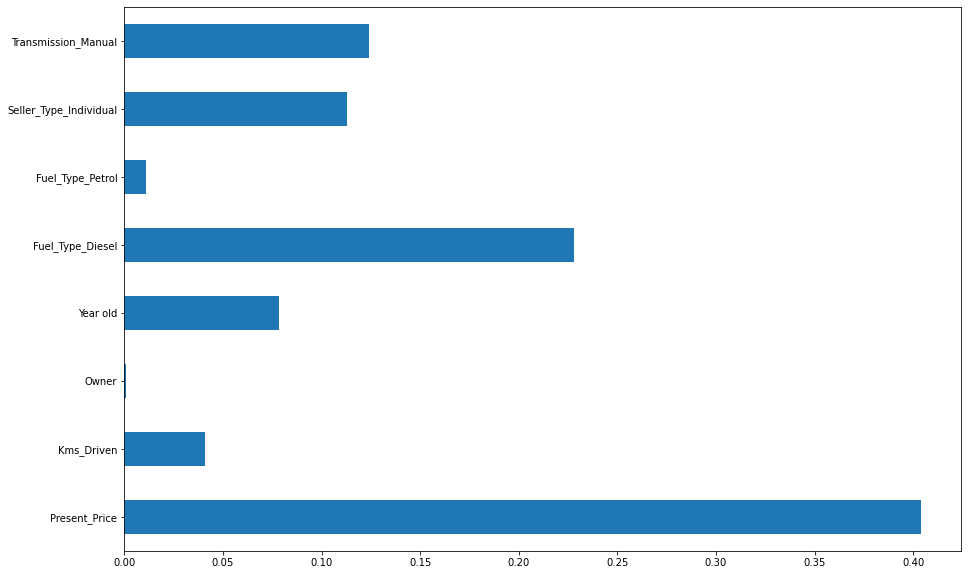

In [21]:
feature_imp = model.feature_importances_

plt.figure(figsize=(15,10))
series = pd.Series(feature_imp,index = x.columns)
series.plot(kind='barh')
plt.show()

In [22]:
# creating a randomforest regressor model
# since records are very less so there is a chance to overfit hence we will be using hyperparamter tuning 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

params = {
    'n_estimators': [30,50,100,250,500] ,
    'max_depth': [5,10,15,20,25] ,
    'max_features': ['auto','sqrt'] 
}

In [24]:
clf = RandomForestRegressor()

model = RandomizedSearchCV(clf,param_distributions=params,cv=5,n_iter=10,
                           scoring='neg_mean_squared_error' , verbose=3)

model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, max_features=sqrt, max_depth=15 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, max_features=sqrt, max_depth=15, score=-4.334, total=   1.2s
[CV] n_estimators=500, max_features=sqrt, max_depth=15 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=500, max_features=sqrt, max_depth=15, score=-8.939, total=   1.2s
[CV] n_estimators=500, max_features=sqrt, max_depth=15 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=500, max_features=sqrt, max_depth=15, score=-1.118, total=   1.2s
[CV] n_estimators=500, max_features=sqrt, max_depth=15 ...............
[CV]  n_estimators=500, max_features=sqrt, max_depth=15, score=-3.628, total=   1.2s
[CV] n_estimators=500, max_features=sqrt, max_depth=15 ...............
[CV]  n_estimators=500, max_features=sqrt, max_depth=15, score=-0.923, total=   1.1s
[CV] n_estimators=100, max_features=sqrt, max_depth=15 ...............
[CV]  n_estimators=100, max_features=sqrt, max_depth=15, score=-4.299, total=   0.2s
[CV] n_estimators=100, max_features=sqrt, max_depth=15 ...............
[CV]  n_estimators=100, max_features=sqrt, max_depth=15, score=-9.747, total=   0.2s
[CV] n_estimators=100, max_features=sqrt, max_depth=15 ...............
[CV]  n_estimators=100, max_features=sqrt, max_depth=15, score=-1.626, total=   0.2s
[CV] n_estimators=100, max_features=sqrt, max_depth=15 ...............
[CV]  n_estimators=100, max_features=sqrt, max_depth=15, score=-

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [30, 50, 100, 250,
                                                         500]},
                   scoring='neg_mean_squared_error', verbose=3)

In [25]:
y_pred = model.predict(x_test)

0.25911497774193587


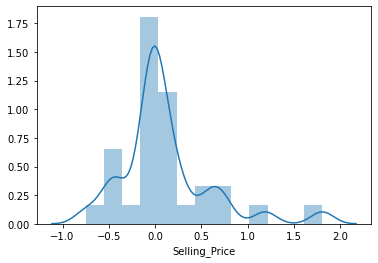

In [29]:
# Evaluating our performance
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

sns.distplot(y_test-y_pred)

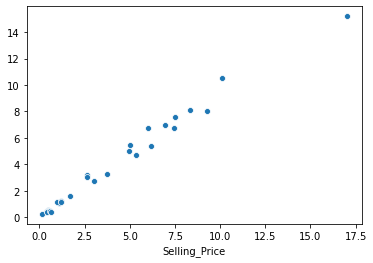

In [27]:
sns.scatterplot(y_test,y_pred)

- So it can be seen that our prediction is pretty much good

In [30]:
# dumping our model to a pickel file
import pickle

file = open('model.pkl' , 'wb')
pickle.dump(model , file)